<a href="https://colab.research.google.com/github/Bogst/MPT_NeuralNetwork/blob/main/ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

#Loading the dataset

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# defining the text labels for each value
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

print(f"x_train shape: {x_train.shape} , y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28) , y_train shape: (60000,)


# Visualizing the data

x_train shape: (60000, 28, 28) , y_train shape: (60000,)
Number of train cases: 60000
Number of test cases: 10000


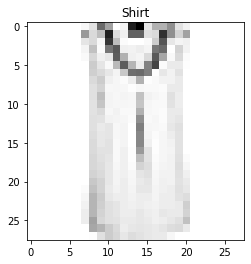

In [3]:
# Printing the shape of the data
print(f"x_train shape: {x_train.shape} , y_train shape: {y_train.shape}")

# Printing the number of training and test cases
print(f"Number of train cases: {x_train.shape[0]}")
print(f"Number of test cases: {x_test.shape[0]}")

# number must be smaller than the number of training samples (60000)
# you can replace the random with any number desired under 60000
vis_img = random.randint(0,59999)
vis_img_label = y_train[vis_img]

plt.imshow(x_train[vis_img], cmap="Greys")
plt.title(fashion_mnist_labels[vis_img_label])
plt.show()

#Data Preprocessing

In [9]:
# Data normalization
x_train = (x_train.astype('float32') + 1e-40) / 255
x_test = (x_test.astype('float32') + 1e-40 ) / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1, 28, 28, 1)


#Creating the model

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding=('same'), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding=('same'), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

#Training the model

In [6]:
model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 3ms/step - loss: 0.5788 - accuracy: 0.7924 - val_loss: 0.2998 - val_accuracy: 0.8890
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2765 - accuracy: 0.8961 - val_loss: 0.2674 - val_accuracy: 0.9022
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2216 - accuracy: 0.9192 - val_loss: 0.2493 - val_accuracy: 0.9077
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1887 - accuracy: 0.9289 - val_loss: 0.2879 - val_accuracy: 0.8979
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1627 - accuracy: 0.9392 - val_loss: 0.2286 - val_accuracy: 0.9197
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1363 - accuracy: 0.9493 - val_loss: 0.2317 - val_accuracy: 0.9183
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9599 - val_loss: 0.2408 - val_accuracy

#Evaluating the model

In [10]:
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.9124


[0.3351733684539795, 0.9124000072479248]

#Visualizing some predictions

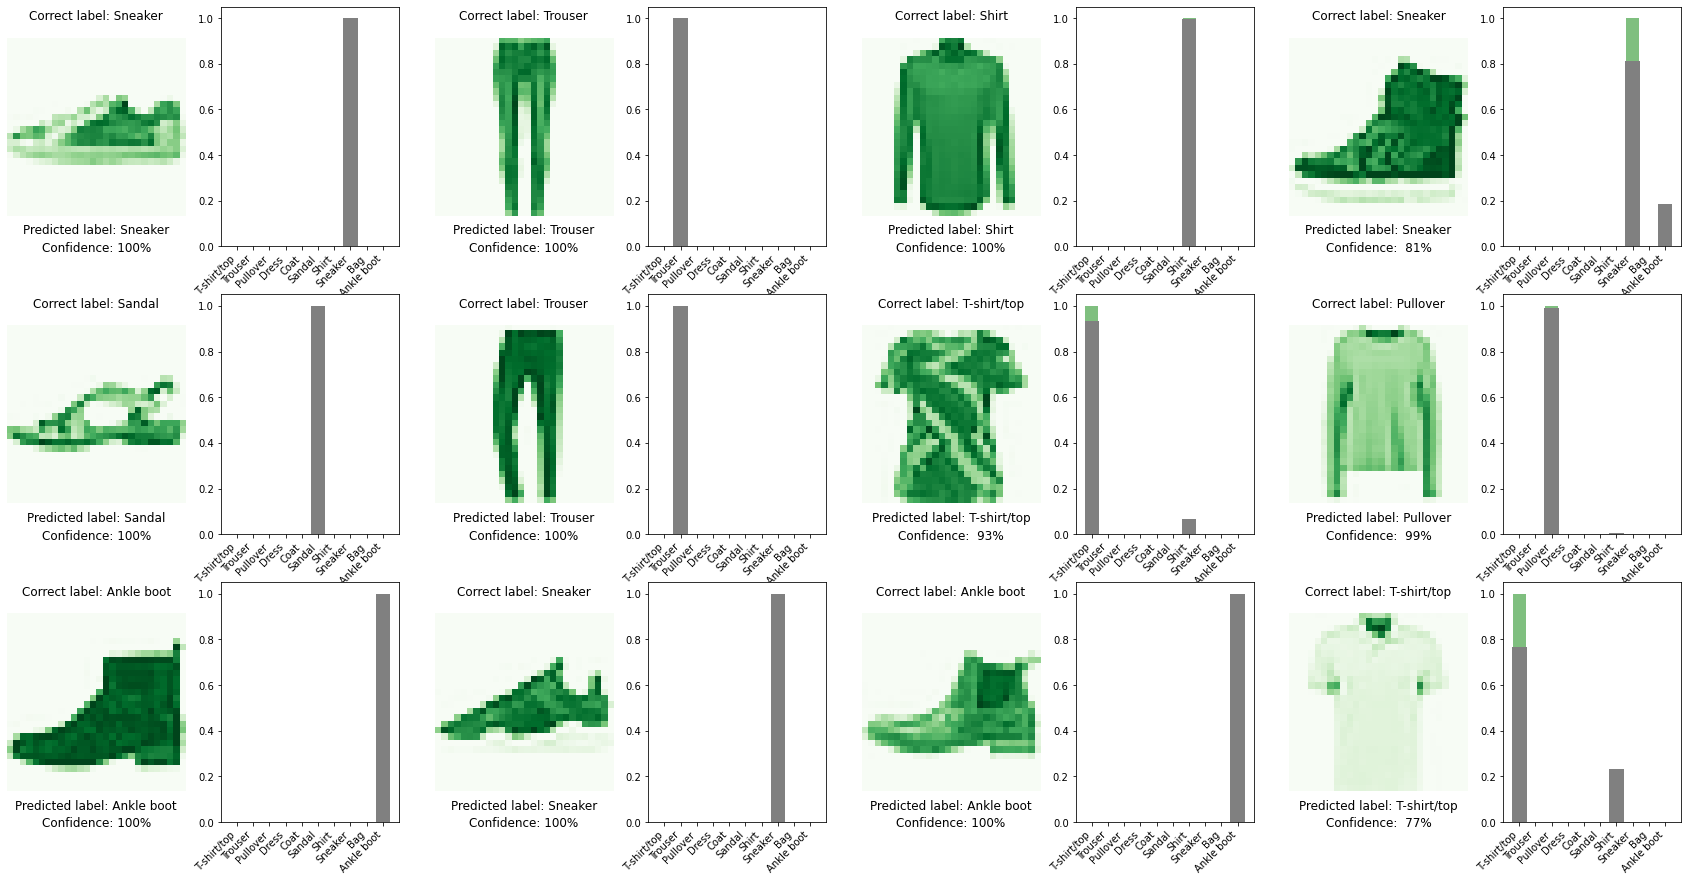

In [14]:
num_cols = 4
num_rows = 3

from matplotlib.ticker import FuncFormatter, MaxNLocator
def format_fn(tick_val, tick_pos):
  if tick_val < len(fashion_mnist_labels):
    return fashion_mnist_labels[int(tick_val)]
  else:
    return ""

fig, axs = plt.subplots(num_rows, num_cols*2, figsize=(30, 15))
for i in range(0, 2 * num_cols * num_rows, 2):

  sample_idx = random.randint(0,999)
  sample = x_test[sample_idx].reshape(28, 28)
  prediction = model(sample.reshape(1,28,28,1))

  subplot2 = axs[i//(num_cols * 2), i%(num_cols * 2)+1]
  subplot2.bar(range(10), tf.keras.utils.to_categorical(y_test[sample_idx], num_classes=10), color="green", alpha=0.5)
  subplot2.bar(range(10), prediction[0], width=0.9, align="center", color='gray')
  subplot2.xaxis.set_major_formatter(FuncFormatter(format_fn))
  subplot2.set_xticks(range(10))
  subplot2.set_xlim([-1,10])
  plt.setp(subplot2.get_xticklabels(), rotation=45, horizontalalignment="right")

  class_prediction = np.argmax(prediction)
  if class_prediction == y_test[sample_idx]:
    color = "Greens"
  else:
    color = "Reds"
  subplot = axs[i//(num_cols * 2), i%(num_cols * 2)]
  subplot.imshow(sample, cmap = color)
  subplot.axis('off')
  subplot.text(0.5,+1.1, f"Correct label: {fashion_mnist_labels[y_test[sample_idx]]}", size=12, ha='center', transform=subplot.transAxes)
  subplot.text(0.5,-0.1, f"Predicted label: {fashion_mnist_labels[class_prediction]}", size=12, ha='center', transform=subplot.transAxes)
  subplot.text(0.5, -0.2, f"Confidence: {prediction[0][class_prediction]*100:3.0f}%", size=12, ha='center', transform=subplot.transAxes)
plt.show()